In [1]:
import pandas as pd
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

In [4]:
data = pd.read_csv('../data/data.txt',sep='\t')

data = data[data['gene_type'] == 'protein_coding']
data

gene_id gene_name       gene_type  BC01_Pooled  BC01_Tumor  \
0      ENSG00000000003.10    TSPAN6  protein_coding         2.33        1.25   
1       ENSG00000000005.5      TNMD  protein_coding         0.00        0.00   
2       ENSG00000000419.8      DPM1  protein_coding        60.70       28.44   
3       ENSG00000000457.9     SCYL3  protein_coding        47.93        4.43   
4      ENSG00000000460.12  C1orf112  protein_coding         4.79        1.67   
...                   ...       ...             ...          ...         ...   
57788   ENSGR0000196433.7      ASMT  protein_coding         0.00        0.00   
57789   ENSGR0000197976.6   AKAP17A  protein_coding         0.00        0.00   
57790  ENSGR0000198223.10    CSF2RA  protein_coding         0.00        0.00   
57791   ENSGR0000205755.6     CRLF2  protein_coding         0.00        0.00   
57792   ENSGR0000214717.5     ZBED1  protein_coding         0.00        0.00   

       BC02_Pooled  BC03_Pooled  BC03LN_Pooled  BC04_Pooled  BC05_Pooled  ...  \
0            43.96         7.64           9.32       133.37        84.77  ...   
1             0.00         0.00           0.00         0.00         0.00  ...   
2            74.73        41.41          87.69       120.41        70.67  ...   
3             9.89         7.61           7.32        12.42        12.02  ...   
4            10.87         0.92          15.13        17.10         5.69  ...   
...            ...          ...            ...          ...          ...  ...   
57788         0.00         0.00           0.00         0.00         0.00  ...   
57789         0.00         0.00           0.00         0.00         0.00  ...   
57790         0.00         0.00           0.00         0.00         0.00  ...   
57791         0.00         0.00           0.00         0.00         0.00  ...   
57792         0.00         0.00           0.00         0.00         0.00  ...   

       BC11_04  BC11_07  BC11_28  BC11_43  BC11_56  BC11_69  BC11_70  BC11_78  \
0         0.00    47.44    16.11     0.00     6.56     0.00     0.00     0.00   
1         0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
2       198.96     0.00     0.00    20.63     0.00     0.00     0.00   136.07   
3         0.00    10.96     0.00     0.00     0.00     0.27     0.00     0.07   
4         0.00     6.97     9.02     0.00     0.00     0.14   247.69    22.60   
...        ...      ...      ...      ...      ...      ...      ...      ...   
57788     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
57789     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
57790     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
57791     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
57792     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   

       BC11_81  BC11_88  
0       200.82     0.00  
1         0.00     0.00  
2        22.03   204.58  
3         0.19     9.52  
4        11.35     0.00  
...        ...      ...  
57788     0.00     0.00  
57789     0.00     0.00  
57790     0.00     0.00  
57791     0.00     0.00  
57792     0.00     0.00  

[20345 rows x 566 columns]

In [5]:

def pca(data):
    '''PCA'''
    # Separate gene ID and gene name columns
    gene_info = data[['gene_id', 'gene_name', 'gene_type']]
    # Select only the expression data columns for PCA
    expression_data = data.drop(['gene_id', 'gene_name', 'gene_type'], axis=1)

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(expression_data)

    # Apply PCA
    pca = PCA(n_components=2)  # You can change the number of components as needed
    principal_components = pca.fit_transform(scaled_data)

def tsne(data):
    selected_columns = data.iloc[:, 3:]  

    tsne = TSNE(n_components=2, perplexity=30)  # Adjust parameters as needed

    # Perform t-SNE
    tsne_result = tsne.fit_transform(selected_columns)

def Umap(data):
    selected_columns = data.iloc[:, 3:]  
    umap_reducer = umap.UMAP(n_components=2)  

    umap_result = umap_reducer.fit_transform(selected_columns)

def find_time(model,execution_times,size):
    # Measure execution time for the algorithm with the current input size
    sample = data.sample(n=size)
    start_time = time.time()
    if model == 'umap':
        Umap(sample)
    elif model == 'pca':
        pca(sample)
    elif model == 'tsne':
        tsne(sample)  # Call your algorithm with the generated data
    end_time = time.time()
    execution_time = end_time - start_time
    
    # Store execution time and corresponding dataset size
    execution_times.append(execution_time)

# Define the range of dataset sizes to test
data_sizes = [250,500,1000,2000,5000,10000,20000]  # Example sizes, adjust as needed

# Lists to store computation times and corresponding dataset sizes
pca_execution_times = []
tsne_execution_times = []
umap_execution_times = []
input_sizes = []

for size in data_sizes:
    find_time('pca',pca_execution_times,size)
    find_time('tsne',tsne_execution_times,size)
    find_time('umap',umap_execution_times,size)
    input_sizes.append(size)

# # Plot the computation time against the input size
# plt.figure(figsize=(8, 6))
# plt.plot(input_sizes, execution_times, marker='o', linestyle='-', color='b')
# plt.title('Algorithm Scaling with Input Size')
# plt.xlabel('Input Size')
# plt.ylabel('Computation Time (s)')
# plt.grid(True)
# plt.show()


d:\CS Software\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\CS Software\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\jerry\AppData\Roaming\Python\Python39\site-packages\numba\np\ufunc\parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
d:\CS Software\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\CS Software\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change 

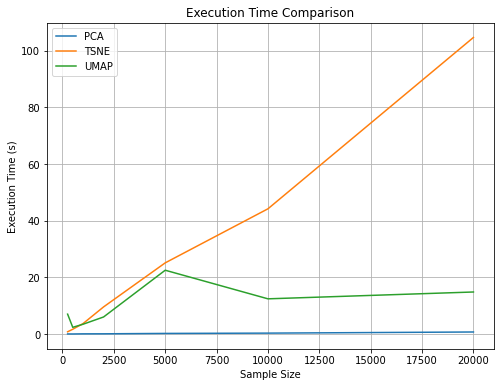

In [18]:
import pandas as pd
import time
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(input_sizes, pca_execution_times, label='PCA')
plt.plot(input_sizes, tsne_execution_times, label='TSNE')
plt.plot(input_sizes, umap_execution_times, label='UMAP')
plt.xlabel('Sample Size')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time Comparison')
plt.legend()
plt.grid(True)
plt.show()